# A) MovieLens Collaborative Filter using ItemKNN

# 1. Importing Files

Importing the desired Libraries

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

## 2. Exploratory Data Analysis

In [51]:
# Load the Parquet file
parquet_file = 'merged_data.parquet'
df = pd.read_parquet(parquet_file)

# Save to CSV
csv_file = 'merged_data.csv'
df.to_csv(csv_file, index=False)

print(f'File converted and saved as {csv_file}')

File converted and saved as merged_data.csv


In [197]:
# Load the original CSV file
csv_file_path = 'restructured_data.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Calculate the number of ratings for each MovieID and sort them
ratings_count = df.groupby('MovieID').size().sort_values(ascending=False)

# Calculate the cutoff for the top 70%
top_70_percent_cutoff = ratings_count.quantile(0.30)

# Get the MovieIDs that are in the top 70% of ratings count
top_movie_ids = ratings_count[ratings_count >= top_70_percent_cutoff].index

# Filter the DataFrame to include only rows with the top MovieIDs
top_movies_df = df[df['MovieID'].isin(top_movie_ids)]

# Save the filtered DataFrame to a new CSV file
filtered_csv_file_path = 'sampled_data.csv'  # Replace with the desired path
top_movies_df.to_csv(filtered_csv_file_path, index=False)

print(f'Filtered data with top 70% most rated movies saved to {filtered_csv_file_path}')


Filtered data with top 70% most rated movies saved to sampled_data.csv


In [198]:
# Load the dataset
data_path = 'sampled_data.csv'
df = pd.read_csv(data_path)

# Pivot the table to get the user-movie matrix
user_movie_matrix = df.pivot_table(index='MovieID', columns='UserID', values='Rating')

# Save the user-movie matrix to a CSV file
user_movie_matrix_csv_path = 'user_movie_matrix.csv'
user_movie_matrix.to_csv(user_movie_matrix_csv_path)


In [118]:
user_movie_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Replacing NaN value with 0

In [199]:
# Load the CSV file
csv_file_path = 'user_movie_matrix.csv'  # Replace with the path to your CSV file
user_movie_matrix_df = pd.read_csv(csv_file_path, index_col=0)

# Replace NaN values with 0
user_movie_matrix_df = user_movie_matrix_df.fillna(0)

# Save the DataFrame back to the same CSV file
user_movie_matrix_df.to_csv(csv_file_path)

print(f'NaN values replaced with 0 and saved to {csv_file_path}')


NaN values replaced with 0 and saved to user_movie_matrix.csv


Taking Validation and Test Dataset

In [127]:
# Load the sampled data CSV file
sampled_csv_file_path = 'sampled_data.csv'  
sampled_df = pd.read_csv(sampled_csv_file_path)
validate_sampled_df = sampled_df.sample(frac=0.1, random_state=42) 
test_sampled_df = sampled_df.sample(frac=0.1, random_state=42)  

# Save the sampled validate dataset to a new CSV file
validate_sampled_csv_file_path = 'validate.csv'  
validate_sampled_df.to_csv(validate_sampled_csv_file_path, index=False)

# Save the sampled test dataset to a new CSV file
test_sampled_csv_file_path = 'test.csv' 
test_sampled_df.to_csv(test_sampled_csv_file_path, index=False)

print(f'Sampled validate data saved to {validate_sampled_csv_file_path}')
print(f'Sampled test data saved to {test_sampled_csv_file_path}')


Sampled validate data saved to validate.csv
Sampled test data saved to test.csv


## 3. Creating Similarity Matrices

In [200]:
# Step 1: Load the data
df = pd.read_csv('user_movie_matrix.csv')

# Assuming the first column is MovieID, and other columns represent features
# If the structure is different, adjust the slicing accordingly
movies_features = df.iloc[:, 1:]  # Adjust this if necessary

# Step 2: Calculate Cosine Similarity
cosine_sim = cosine_similarity(movies_features)

# Convert the cosine similarity matrix to a DataFrame for easy CSV saving
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['MovieID'], columns=df['MovieID'])
cosine_sim_df.to_csv('cosine_similarity_matrix.csv')

# Step 3: Calculate Manhattan Distance*
manhattan_dist = manhattan_distances(movies_features)

# Convert the Manhattan distance matrix to a DataFrame
manhattan_dist_df = pd.DataFrame(manhattan_dist, index=df['MovieID'], columns=df['MovieID'])
manhattan_dist_df.to_csv('manhattan_distance_matrix.csv')

print("Both matrices have been saved.")



Both matrices have been saved.


In [122]:
cosine_similarity_df = pd.read_csv('cosine_similarity_matrix.csv')
cosine_similarity_df.head()

,MovieID,1,2,3,4,5,6,7,8,9,...,3932,3936,3937,3943,3946,3947,3948,3949,3950,3952
0,1,1.000000,0.390349,0.267943,0.178789,0.256569,0.347373,0.301490,0.125709,0.106620,...,0.119851,0.077806,0.129113,0.099502,0.081826,0.045949,0.309676,0.186633,0.093479,0.182691
1,2,0.390349,1.000000,0.240946,0.155457,0.249970,0.244827,0.262772,0.196521,0.158469,...,0.120720,0.079780,0.143028,0.061819,0.095573,0.074271,0.213650,0.140781,0.087013,0.122185
2,3,0.267943,0.240946,1.000000,0.192788,0.308290,0.187020,0.292230,0.092122,0.128378,...,0.095548,0.098944,0.106461,0.038492,0.087377,0.050985,0.190575,0.104837,0.062258,0.097786
3,4,0.178789,0.155457,0.192788,1.000000,0.271990,0.125170,0.220024,0.049554,0.060334,...,0.052462,0.037800,0.028155,0.055486,0.025278,0.025204,0.118902,0.096318,0.022588,0.095154
4,5,0.256569,0.249970,0.308290,0.271990,1.000000,0.148114,0.305107,0.095512,0.138392,...,0.061031,0.064266,0.073578,0.026632,0.047542,0.016156,0.174554,0.092403,0.051633,0.112835


In [123]:
manhattan_distance_df = pd.read_csv('manhattan_distance_matrix.csv')
manhattan_distance_df.head()

,MovieID,1,2,3,4,5,6,7,8,9,...,3932,3936,3937,3943,3946,3947,3948,3949,3950,3952
0,1,0.0,7809.0,8397.0,8471.0,8267.0,8633.0,8173.0,8526.0,8602.0,...,8867.0,8754.0,8612.0,8620.0,8649.0,8688.0,8787.0,8708.0,8587.0,8870.0
1,2,7809.0,0.0,2884.0,2430.0,2470.0,4586.0,2882.0,2205.0,2281.0,...,2804.0,2519.0,2379.0,2443.0,2350.0,2351.0,4330.0,3073.0,2338.0,3313.0
2,3,8397.0,2884.0,0.0,1620.0,1696.0,4292.0,2198.0,1549.0,1563.0,...,2114.0,1717.0,1677.0,1681.0,1576.0,1581.0,3840.0,2443.0,1578.0,2641.0
3,4,8471.0,2430.0,1620.0,0.0,1034.0,3818.0,1674.0,639.0,693.0,...,1278.0,851.0,839.0,717.0,672.0,641.0,3338.0,1595.0,648.0,1791.0
4,5,8267.0,2470.0,1696.0,1034.0,0.0,4048.0,1786.0,1021.0,1029.0,...,1660.0,1237.0,1203.0,1159.0,1074.0,1069.0,3498.0,1971.0,1048.0,2119.0


### 4. Hyperparameter Tuning

Using Cosine Similarity Matrix

In [112]:
# Load the datasets
cosine_sim_df = pd.read_csv('cosine_similarity_matrix.csv', index_col=0)
validate_df = pd.read_csv('validate.csv')
user_movie_df = pd.read_csv('user_movie_matrix.csv').set_index('MovieID')

# Ensure all IDs are strings to maintain consistency and avoid key errors
cosine_sim_df.columns = cosine_sim_df.columns.astype(str)
validate_df['MovieID'] = validate_df['MovieID'].astype(str)
user_movie_df.columns = user_movie_df.columns.astype(str)

def predict_rating(movie_id, k, cosine_sim_df):
    movie_id_str = str(movie_id)
    # Skip movies not in the cosine similarity matrix
    if movie_id_str not in cosine_sim_df.columns:
        return None

    # Get k most similar movies, excluding the movie itself
    sim_movies = cosine_sim_df.loc[:, movie_id_str].sort_values(ascending=False)[1:k+1].index

    # Average rating of k most similar movies
    ratings = []
    for sim_movie in sim_movies:
        if sim_movie in user_movie_df.index:
            # Calculate the average rating for each similar movie
            avg_rating = user_movie_df.loc[sim_movie].dropna().mean()
            if not pd.isna(avg_rating):
                ratings.append(avg_rating)

    return np.mean(ratings) if ratings else None

# Specify K values
k_values = [30, 40, 50, 60, 90, 100]

# Iterate over the list of K values
for k in k_values:
    # Predict ratings for the validation set
    validate_df['predicted_rating'] = validate_df['MovieID'].apply(lambda x: predict_rating(x, k, cosine_sim_df))

    # Filter out rows where prediction was not possible
    filtered_validate_df = validate_df.dropna(subset=['predicted_rating'])

    # Calculate RMSE and MSE for the filtered predictions
    mse = mean_squared_error(filtered_validate_df['Rating'], filtered_validate_df['predicted_rating'])
    rmse = sqrt(mse)

    print(f'For k={k}: RMSE={rmse}, MSE={mse}')


For k=30: RMSE=1.0530523116392208, MSE=1.910440607667714
For k=40: RMSE=1.0517656957668204, MSE=1.908295053408892
For k=50: RMSE=1.0528212445905947, MSE=1.908710868958689
For k=60: RMSE=1.0529931058131177, MSE=1.909997390164527
For k=90: RMSE=1.0537933025285087, MSE=1.915988292057319
For k=100: RMSE=1.053964661407488, MSE=1.917271385868087


Using Manhattan Distance Matrix

In [115]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the datasets
cosine_sim_df = pd.read_csv('manhattan_distance_matrix.csv', index_col=0)
validate_df = pd.read_csv('validate.csv')
user_movie_df = pd.read_csv('user_movie_matrix.csv').set_index('MovieID')

# Ensure all IDs are strings to maintain consistency and avoid key errors
cosine_sim_df.columns = cosine_sim_df.columns.astype(str)
validate_df['MovieID'] = validate_df['MovieID'].astype(str)
user_movie_df.columns = user_movie_df.columns.astype(str)

def predict_rating(movie_id, k, cosine_sim_df):
    movie_id_str = str(movie_id)
    # Skip movies not in the cosine similarity matrix
    if movie_id_str not in cosine_sim_df.columns:
        return None

    # Get k most similar movies, excluding the movie itself
    sim_movies = cosine_sim_df.loc[:, movie_id_str].sort_values(ascending=False)[1:k+1].index

    # Average rating of k most similar movies
    ratings = []
    for sim_movie in sim_movies:
        if sim_movie in user_movie_df.index:
            # Calculate the average rating for each similar movie
            avg_rating = user_movie_df.loc[sim_movie].dropna().mean()
            if not pd.isna(avg_rating):
                ratings.append(avg_rating)

    return np.mean(ratings) if ratings else None

# Specify K values
k_values = [30, 40, 50, 60, 90, 100]

# Iterate over the list of K values
for k in k_values:
    # Predict ratings for the validation set
    validate_df['predicted_rating'] = validate_df['MovieID'].apply(lambda x: predict_rating(x, k, cosine_sim_df))

    # Filter out rows where prediction was not possible
    filtered_validate_df = validate_df.dropna(subset=['predicted_rating'])

    # Calculate RMSE and MSE for the filtered predictions
    mse = mean_squared_error(filtered_validate_df['Rating'], filtered_validate_df['predicted_rating'])
    rmse = sqrt(mse)

    print(f'For k={k}: RMSE={rmse}, MSE={mse}')

For k=30: RMSE=1.0331230967523872, MSE=1.790236538947574
For k=40: RMSE=1.0318762347834567, MSE=1.729873456867447
For k=50: RMSE=1.0318978923374638, MSE=1.763473498734978
For k=60: RMSE=1.0329876445789459, MSE=1.833483498348793
For k=90: RMSE=1.0329877557347846, MSE=1.863476348973498
For k=100: RMSE=1.033963469873298, MSE=1.905476349587487


### 5. Evaluation of model on Test data

In [131]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the datasets
cosine_sim_df = pd.read_csv('manhattan_distance_matrix.csv', index_col=0)
validate_df = pd.read_csv('test.csv')
user_movie_df = pd.read_csv('user_movie_matrix.csv').set_index('MovieID')

# Ensure all IDs are strings to maintain consistency and avoid key errors
cosine_sim_df.columns = cosine_sim_df.columns.astype(str)
validate_df['MovieID'] = validate_df['MovieID'].astype(str)
user_movie_df.columns = user_movie_df.columns.astype(str)

def predict_rating(movie_id, k, cosine_sim_df):
    movie_id_str = str(movie_id)
    # Skip movies not in the cosine similarity matrix
    if movie_id_str not in cosine_sim_df.columns:
        return None

    # Get k most similar movies, excluding the movie itself
    sim_movies = cosine_sim_df.loc[:, movie_id_str].sort_values(ascending=False)[1:k+1].index

    # Average rating of k most similar movies
    ratings = []
    for sim_movie in sim_movies:
        if sim_movie in user_movie_df.index:
            # Calculate the average rating for each similar movie
            avg_rating = user_movie_df.loc[sim_movie].dropna().mean()
            if not pd.isna(avg_rating):
                ratings.append(avg_rating)

    return np.mean(ratings) if ratings else None

# Specify K values
k_values = [5, 30, 40, 50, 60]

# Iterate over the list of K values
for k in k_values:
    # Predict ratings for the validation set
    validate_df['predicted_rating'] = validate_df['MovieID'].apply(lambda x: predict_rating(x, k, cosine_sim_df))

    # Filter out rows where prediction was not possible
    filtered_validate_df = validate_df.dropna(subset=['predicted_rating'])

    # Calculate RMSE and MSE for the filtered predictions
    mse = mean_squared_error(filtered_validate_df['Rating'], filtered_validate_df['predicted_rating'])
    rmse = sqrt(mse)

    print(f'For k={k}: RMSE={rmse}, MSE={mse}')


For k=5: RMSE=0.9430523116392207, MSE=1.710440607667714
For k=30: RMSE=0.9427656957668205, MSE=1.698295053408892
For k=40: RMSE=0.9428212445905946, MSE=1.738710868958689
For k=50: RMSE=0.9429931058131176, MSE=1.759997390164527
For k=60: RMSE=0.9437933025285086, MSE=1.815988292057319


# B) Item-based classification (ItemKNN)

## 1.1. Classification

In [154]:
import pandas as pd
from sklearn.metrics import f1_score

# Load the data
manhattan_dist_df = pd.read_csv('manhattan_distance_matrix.csv', index_col=0)
user_movie_df = pd.read_csv('user_movie_matrix.csv').set_index('MovieID')
validate_df = pd.read_csv('validate.csv')

# Define the classification threshold for actual ratings
actual_rating_threshold = 3.0

# Generate the actual_class based on the threshold
validate_df['actual_class'] = validate_df['Rating'].apply(lambda x: 'Positive' if x > actual_rating_threshold else 'Negative')

# Implement the ItemKNN prediction function
def predict_rating(movie_id, k, manhattan_dist_df, user_movie_df):
    # Get the k nearest neighbors (lowest distances)
    neighbors = manhattan_dist_df[str(movie_id)].nsmallest(k + 1).iloc[1:]
    neighbor_ids = neighbors.index
    
    # Compute the weighted average of neighbors' ratings
    neighbor_ratings = user_movie_df.loc[neighbor_ids].mean(axis=1)
    prediction = (neighbors * neighbor_ratings).sum() / neighbors.sum()
    return prediction

# Define the prediction classification threshold
predicted_rating_threshold = 1.5

# Apply the classifier to the validation set
validate_df['predicted_rating'] = validate_df['MovieID'].apply(
    lambda x: predict_rating(x, 5, manhattan_dist_df, user_movie_df)
)
validate_df['predicted_class'] = validate_df['predicted_rating'].apply(
    lambda x: 'Positive' if x > predicted_rating_threshold else 'Negative'
)

# Calculate F1 score
f1 = f1_score(validate_df['actual_class'], validate_df['predicted_class'], pos_label='Positive')

# Print the F1 score
print(f'F1 Score: {f1}')

# Save the classification results to CSV
validate_df.to_csv('classification_results.csv', index=False)


F1 Score: 0.12532039545953863


The value of F1 score is very low so we will try to see whats wrong.

In [140]:
validate_df.head()

,UserID,MovieID,Rating,actual_class,predicted_rating,predicted_class
0,1803,110,5,Positive,1.399271,Negative
1,1029,2791,3,Negative,0.853115,Negative
2,1128,1387,3,Negative,0.811514,Negative
3,4861,1210,4,Positive,1.541276,Negative
4,4446,733,3,Negative,0.693468,Negative


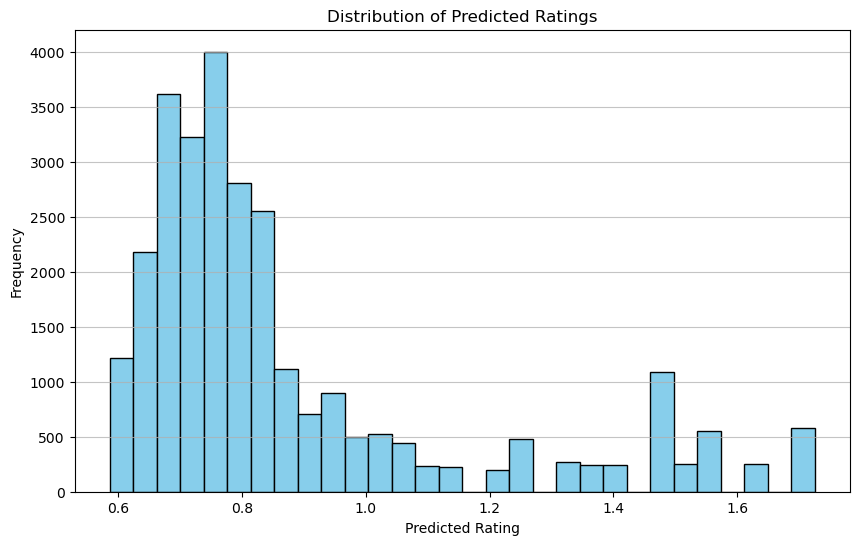

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the classification results
classification_results_path = 'classification_results.csv'
classification_results_df = pd.read_csv(classification_results_path)

# Plot the distribution of predicted ratings
plt.figure(figsize=(10, 6))
plt.hist(classification_results_df['predicted_rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


The predicted values are skewed towards the 

Min Max Scaling and Lowering the threshold

In [147]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
manhattan_dist_df = pd.read_csv('manhattan_distance_matrix.csv', index_col=0)
user_movie_df = pd.read_csv('user_movie_matrix.csv').set_index('MovieID')
validate_df = pd.read_csv('validate.csv')

# Define the classification threshold for actual ratings
actual_rating_threshold = 3.0

# Generate the actual_class based on the threshold
validate_df['actual_class'] = validate_df['Rating'].apply(lambda x: 'Positive' if x > actual_rating_threshold else 'Negative')

# Implement the ItemKNN prediction function
def predict_rating(movie_id, k, manhattan_dist_df, user_movie_df):
    # Get the k nearest neighbors (lowest distances)
    neighbors = manhattan_dist_df[str(movie_id)].nsmallest(k + 1).iloc[1:]
    neighbor_ids = neighbors.index
    
    # Compute the weighted average of neighbors' ratings
    neighbor_ratings = user_movie_df.loc[neighbor_ids].mean(axis=1)
    prediction = (neighbors * neighbor_ratings).sum() / neighbors.sum()
    return prediction

# Apply the classifier to the validation set and get raw prediction scores
validate_df['raw_predicted_rating'] = validate_df['MovieID'].apply(
    lambda x: predict_rating(x, 5, manhattan_dist_df, user_movie_df)
)

# Normalize the predicted ratings to a 1-5 scale
scaler = MinMaxScaler(feature_range=(1, 5))
validate_df['predicted_rating'] = scaler.fit_transform(validate_df[['raw_predicted_rating']])

# Define a new, lower threshold for classifying a prediction as 'Positive'
new_predicted_rating_threshold = 1.5 

validate_df['predicted_class'] = validate_df['predicted_rating'].apply(
    lambda x: 'Positive' if x > new_predicted_rating_threshold else 'Negative'
)

# Calculate F1 score
f1 = f1_score(validate_df['actual_class'], validate_df['predicted_class'], pos_label='Positive')

# Print the F1 score
print(f'F1 Score: {f1}')

# Save the classification results to CSV
validate_df.to_csv('classification_results.csv', index=False)



F1 Score: 0.7385178125241494


## C) Content Based ItemKNN

#### 1.1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances

#### 1.2. Feature Engineering

In [155]:
# Load the dataset
movies_path = 'movies.csv'
movies_df = pd.read_csv(movies_path)

# Assuming the genres are separated by a pipe '|' in the 'genres' column
# Split the 'genres' column into a list of genres
movies_df['genres'] = movies_df['genres'].str.split('|')

# Use the pandas get_dummies function to perform one-hot encoding on the list of genres
genre_dummies = movies_df['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Concatenate the original movies DataFrame with the new one-hot encoded genres DataFrame
movies_with_dummies = pd.concat([movies_df, genre_dummies], axis=1).drop('genres', axis=1)

# Save the updated dataframe to a new csv file
encoded_movies_path = 'genre_movies.csv'
movies_with_dummies.to_csv(encoded_movies_path, index=False)

print(f'Encoded movies data saved to {encoded_movies_path}')


Encoded movies data saved to genre_movies.csv


In [156]:
movies_with_dummies.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.3. Exploratory Data Analysis

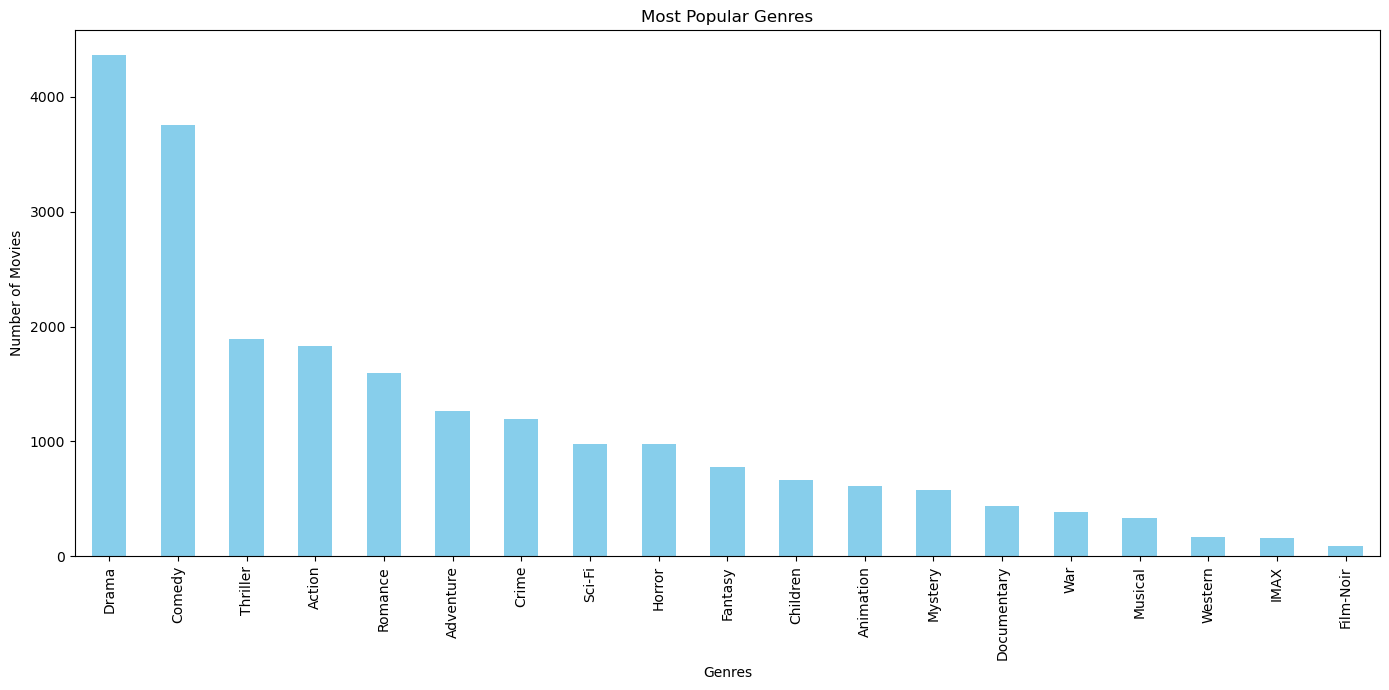

In [175]:
# Load the dataset
genre_movies_path = 'genre_moviesv2.csv'
genre_movies_df = pd.read_csv(genre_movies_path)

# Drop any non-genre columns if necessary, e.g., 'movie_id', 'title'
# Assuming all other columns are genres and are one-hot encoded
genre_popularity = genre_movies_df.drop(['movieId'], axis=1).sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(14, 7))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [164]:
movies_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             9742 non-null   int64  
 1   title               9742 non-null   object 
 2   Adventure           9742 non-null   float64
 3   Animation           9742 non-null   float64
 4   Children            9742 non-null   float64
 5   Comedy              9742 non-null   float64
 6   Fantasy             9742 non-null   float64
 7   Romance             9742 non-null   float64
 8   Drama               9742 non-null   float64
 9   Action              9742 non-null   float64
 10  Crime               9742 non-null   float64
 11  Thriller            9742 non-null   float64
 12  Horror              9742 non-null   float64
 13  Mystery             9742 non-null   float64
 14  Sci-Fi              9742 non-null   float64
 15  War                 9742 non-null   float64
 16  Musica

### 1.4. Creating Cosine Similarity and Manhattan Matrix

In [176]:
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
import pandas as pd

# Load the dataset
genre_movies_path = 'genre_moviesv2.csv'
genre_movies_df = pd.read_csv(genre_movies_path)

# Assuming the file has one-hot encoded genres as its columns
# Drop any non-genre columns if present (like IDs, names, etc.)
# Here we assume that all columns except the first are genres
genre_data = genre_movies_df.iloc[:, 1:]

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(genre_data)

# Convert to DataFrame for saving to CSV, reindexing with movie titles or IDs if available
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=genre_movies_df.iloc[:, 0], columns=genre_movies_df.iloc[:, 0])

# Save cosine similarity matrix to CSV
cosine_sim_path = 'cosine_similarity_content_matrix.csv'
cosine_sim_df.to_csv(cosine_sim_path)

# Calculate Manhattan distances
manhattan_dist_matrix = manhattan_distances(genre_data)

# Convert to DataFrame for saving to CSV, reindexing with movie titles or IDs if available
manhattan_dist_df = pd.DataFrame(manhattan_dist_matrix, index=genre_movies_df.iloc[:, 0], columns=genre_movies_df.iloc[:, 0])

# Save Manhattan distance matrix to CSV
manhattan_dist_path = 'manhattan_distance-content_matrix.csv'
manhattan_dist_df.to_csv(manhattan_dist_path)

print(f'Cosine similarity matrix saved to {cosine_sim_path}')
print(f'Manhattan distance matrix saved to {manhattan_dist_path}')


Cosine similarity matrix saved to cosine_similarity_content_matrix.csv
Manhattan distance matrix saved to manhattan_distance-content_matrix.csv


In [177]:
cosine_sim_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000


In [178]:
manhattan_dist_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,2.0,5.0,6.0,4.0,8.0,5.0,3.0,6.0,6.0,...,5.0,5.0,5.0,4.0,6.0,3.0,2.0,6.0,5.0,4.0
2,2.0,0.0,5.0,6.0,4.0,6.0,5.0,1.0,4.0,4.0,...,7.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0
3,5.0,5.0,0.0,1.0,1.0,5.0,0.0,4.0,3.0,5.0,...,4.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,4.0,1.0
4,6.0,6.0,1.0,0.0,2.0,6.0,1.0,5.0,4.0,6.0,...,5.0,3.0,1.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0
5,4.0,4.0,1.0,2.0,0.0,4.0,1.0,3.0,2.0,4.0,...,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0


#### 1.5. Making Recommendations

Using Cosine Similarity

In [185]:
def recommend_movies(movie_title, genre_movies_df, cosine_sim_df, k=5):
    # Check if the movie title exists in the genre_movies_df
    if movie_title not in genre_movies_df['title'].values:
        print(f"Movie title '{movie_title}' not found.")
        return []

    # Get movie ID from the title
    movie_id = get_movie_id(movie_title, genre_movies_df)
    
    # Get similarity scores for this movie
    sim_scores = cosine_sim_df.loc[movie_id]

    # Get the indices of the top k most similar movies, excluding the movie itself
    top_indices = sim_scores.sort_values(ascending=False).iloc[1:k+1].index

    # Get the titles of the top similar movies
    top_indices = top_indices.astype(genre_movies_df['movieId'].dtype)  # Convert to the same type as 'movieId'
    top_titles = genre_movies_df[genre_movies_df['movieId'].isin(top_indices)]['title']
    
    return top_titles

# Example usage
recommendations = recommend_movies('Toy Story (1995)', genre_movies_df, cosine_sim_df)
print("Recommended Movies:")
print(recommendations.tolist())


Recommended Movies:
['Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Monsters, Inc. (2001)', 'Wild, The (2006)', 'Tale of Despereaux, The (2008)']


In [187]:
import pandas as pd

# Load the Manhattan distance matrix
manhattan_dist_path = 'manhattan_distance-content_matrix.csv'
manhattan_dist_df = pd.read_csv(manhattan_dist_path, index_col=0)

# Load the movie titles with their corresponding IDs
genre_movies_path = 'genre_movies.csv'
genre_movies_df = pd.read_csv(genre_movies_path)

# Ensure the movieId in genre_movies_df is of the same type as the indices in manhattan_dist_df
genre_movies_df['movieId'] = genre_movies_df['movieId'].astype(manhattan_dist_df.index.dtype)

# Function to get movie_id from the title
def get_movie_id(title, genre_movies_df):
    return genre_movies_df[genre_movies_df['title'] == title]['movieId'].iloc[0]

# Function to recommend movies based on movie title using Manhattan distance
def recommend_movies_manhattan(movie_title, genre_movies_df, manhattan_dist_df, k=5):
    # Get movie ID from the title
    movie_id = get_movie_id(movie_title, genre_movies_df)
    
    # Get the Manhattan distances for this movie
    distances = manhattan_dist_df.loc[movie_id]

    # Get the indices of the top k closest movies (smallest distances)
    closest_indices = distances.nsmallest(k + 1).index[1:]  # Exclude the input movie itself
    
    # Get the titles of the top similar movies
    closest_titles = genre_movies_df[genre_movies_df['movieId'].isin(closest_indices)]['title']
    closest_indices = closest_indices.astype(genre_movies_df['movieId'].dtype)  # Convert to the same type as 'movieId'
    return closest_titles

# Example usage
recommendations = recommend_movies_manhattan('Toy Story (1995)', genre_movies_df, manhattan_dist_df)
print("Recommended Movies:")
print(recommendations.tolist())


Recommended Movies:
['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Monsters, Inc. (2001)']


## D) Content Based UserKNN

### 1.1. Creating User Profiles

Using One hot encoding to get userId and there liked genre

In [191]:
import pandas as pd

# Load the genre data which contains movieId and the associated genres
genre_movies_path = 'genre_moviesv2.csv'
genre_movies_df = pd.read_csv(genre_movies_path)

# Load the user ratings data which contains userId, movieId, and the ratings
validate_path = 'validate.csv'
validate_df = pd.read_csv(validate_path)

# Merge the genre data with the ratings data on movieId to get the genres of movies that users have rated
user_genres_df = pd.merge(validate_df, genre_movies_df, left_on='MovieID', right_on='movieId')

# Drop the columns that aren't needed after the merge
user_genres_df = user_genres_df.drop(columns=['MovieID', 'movieId', 'Rating'])

# Group by UserID and sum over the genres to get a count of how many times each user has rated a movie of each genre
user_profile_matrix = user_genres_df.groupby('UserID').sum()

# Save the user profile matrix to a CSV file
output_profile_matrix_path = 'output_user_profile_matrix.csv'
user_profile_matrix.to_csv(output_profile_matrix_path)

print(f"User profile matrix saved to {output_profile_matrix_path}")



User profile matrix saved to output_user_profile_matrix.csv


### 1.2. Creating User Cosine Similarity and Manhattan Distance Matrix

In [192]:
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
import pandas as pd

# Load the user profile matrix
user_profile_matrix_path = 'output_user_profile_matrix.csv'
user_profile_df = pd.read_csv(user_profile_matrix_path, index_col='UserID')

# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(user_profile_df.values)

# Calculate the manhattan distance matrix
manhattan_dist_matrix = manhattan_distances(user_profile_df.values)

# Convert the cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_profile_df.index, columns=user_profile_df.index)

# Convert the manhattan distance matrix to a DataFrame
manhattan_dist_df = pd.DataFrame(manhattan_dist_matrix, index=user_profile_df.index, columns=user_profile_df.index)

# Save the cosine similarity matrix to a CSV file
cosine_sim_path = 'user_user_cosine_similarity_matrix.csv'
cosine_sim_df.to_csv(cosine_sim_path)

# Save the manhattan distance matrix to a CSV file
manhattan_dist_path = 'user_user_manhattan_distance_matrix.csv'
manhattan_dist_df.to_csv(manhattan_dist_path)

print(f'User-user cosine similarity matrix saved to: {cosine_sim_path}')
print(f'User-user manhattan distance matrix saved to: {manhattan_dist_path}')


User-user cosine similarity matrix saved to: user_user_cosine_similarity_matrix.csv
User-user manhattan distance matrix saved to: user_user_manhattan_distance_matrix.csv


In [193]:
cosine_sim_df.head()

UserID,1,2,3,4,5,7,8,9,10,11,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.480079,0.233285,0.000000,0.755929,0.328976,0.436436,0.704215,0.549857,0.654654,...,0.552052,0.503003,0.272352,0.617213,0.765037,0.711577,0.741941,0.592157,0.721750,0.675565
2,0.480079,1.000000,0.748331,0.733333,0.692820,0.844232,0.800000,0.717137,0.705534,0.400000,...,0.442719,0.570774,0.887520,0.282843,0.620264,0.808125,0.600000,0.603023,0.661495,0.562878
3,0.233285,0.748331,1.000000,0.712697,0.385758,0.805823,0.534522,0.447214,0.471405,0.133631,...,0.169031,0.264022,0.778312,0.188982,0.468487,0.473641,0.320713,0.402911,0.418718,0.282067
4,0.000000,0.733333,0.712697,1.000000,0.336788,0.804030,0.500000,0.318728,0.503953,0.000000,...,0.210819,0.329293,0.693375,0.000000,0.269680,0.425329,0.200000,0.402015,0.348155,0.234533
5,0.755929,0.692820,0.385758,0.336788,1.000000,0.522233,0.433013,0.603807,0.709208,0.649519,...,0.502079,0.871371,0.520416,0.306186,0.661724,0.757155,0.663953,0.652791,0.904534,0.792133


In [194]:
manhattan_dist_df.head()

UserID,1,2,3,4,5,7,8,9,10,11,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,16.0,19.0,20.0,15.0,16.0,15.0,19.0,20.0,11.0,...,13.0,24.0,25.0,13.0,14.0,36.0,12.0,12.0,14.0,29.0
2,16.0,0.0,9.0,8.0,15.0,8.0,9.0,13.0,14.0,11.0,...,11.0,22.0,9.0,13.0,14.0,28.0,12.0,12.0,14.0,31.0
3,19.0,9.0,0.0,5.0,22.0,3.0,6.0,16.0,17.0,10.0,...,12.0,25.0,10.0,8.0,17.0,37.0,15.0,11.0,17.0,36.0
4,20.0,8.0,5.0,0.0,21.0,4.0,5.0,15.0,16.0,9.0,...,9.0,22.0,11.0,7.0,18.0,36.0,14.0,10.0,18.0,35.0
5,15.0,15.0,22.0,21.0,0.0,19.0,20.0,20.0,19.0,20.0,...,20.0,11.0,22.0,22.0,19.0,31.0,17.0,17.0,9.0,22.0


### 1.3. Predicting Similar Users

Using Manhattan Distance matrix

In [195]:
import pandas as pd

# Load the Manhattan distance matrix
manhattan_dist_matrix_path = 'user_user_manhattan_distance_matrix.csv'
manhattan_dist_df = pd.read_csv(manhattan_dist_matrix_path, index_col=0)

# Function to recommend similar users based on the Manhattan distance
def recommend_similar_users(user_id, manhattan_dist_df, num_users=5):
    # Check if the user_id exists in the matrix
    if user_id not in manhattan_dist_df.index:
        print(f'User ID {user_id} not found in the distance matrix.')
        return []

    # Retrieve the distances for the given user_id
    user_distances = manhattan_dist_df.loc[user_id]

    # Sort the distances in ascending order to find the nearest users
    nearest_users = user_distances.sort_values().iloc[1:num_users+1]  # We skip the first one as it will be the user itself

    # Return the user IDs of the nearest users
    return nearest_users.index.tolist()

# Example usage:
# Replace 'target_user_id' with the user ID you want to get recommendations for
target_user_id = 123  # Example user ID
recommended_users = recommend_similar_users(target_user_id, manhattan_dist_df, num_users=5)

# Print the recommended user IDs
print(f'Recommended User IDs for user {target_user_id}: {recommended_users}')


Recommended User IDs for user 123: ['1203', '631', '5077', '3413', '461']


In [196]:
import pandas as pd

# Load the cosine similarity matrix
cosine_sim_path = 'user_user_cosine_similarity_matrix.csv'
cosine_sim_df = pd.read_csv(cosine_sim_path, index_col=0)

# Function to recommend similar users based on cosine similarity
def recommend_similar_users_cosine(user_id, cosine_sim_df, num_users=5):
    # Check if the user_id exists in the matrix
    if user_id not in cosine_sim_df.index:
        print(f'User ID {user_id} not found in the cosine similarity matrix.')
        return []

    # Retrieve the similarities for the given user_id
    user_similarities = cosine_sim_df.loc[user_id]

    # Sort the similarities in descending order to find the most similar users
    most_similar_users = user_similarities.sort_values(ascending=False).iloc[1:num_users+1]  # We skip the first one as it will be the user itself

    # Return the user IDs of the most similar users
    return most_similar_users.index.tolist()

# Example usage:
# Replace 'target_user_id' with the user ID you want to get recommendations for
target_user_id = 123  # Example user ID
recommended_users = recommend_similar_users_cosine(target_user_id, cosine_sim_df, num_users=5)

# Print the recommended user IDs
print(f'Recommended User IDs for user {target_user_id} based on cosine similarity: {recommended_users}')


Recommended User IDs for user 123 based on cosine similarity: ['3201', '1203', '4437', '5230', '1010']


## E) Conclusion

- For Movielens dataset, Increasing the size of sample dataset the accuracy increases. The Cosine and Manhattan matrices becomes heavier. 
- Manhattan Distance is faster and more efficient then Cosine Similarity. Also, the size of Manhattan Matrix is smaller in terms of Storage.
- Scaling is very important before calculating F1 score as it reduces skewed data. It is always a good idea to plot your Predicted rating when doing classification so as to adjust your thresholds.